In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
features = pd.read_csv('/content/W_features.csv')
sample = pd.read_csv('/content/W_sample_submission.csv')
store = pd.read_csv('/content/W_store.csv')

In [3]:
features.head()

,Unnamed: 0,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,2,2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,3,3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,4,4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [4]:
sample.head()

,Unnamed: 0,index,Id,Weekly_Sales
0,0,0,1_1_2012-11-02,0
1,1,1,1_1_2012-11-09,0
2,2,2,1_1_2012-11-16,0
3,3,3,1_1_2012-11-23,0
4,4,4,1_1_2012-11-30,0


In [6]:
store.head()

,Unnamed: 0,index,Store,Type,Size
0,0,0,1,A,151315
1,1,1,2,A,202307
2,2,2,3,B,37392
3,3,3,4,A,205863
4,4,4,5,B,34875


In [11]:
df = pd.merge(pd.merge(features,sample,on='index'),store,on='index')

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.head()

,Unnamed: 0_x,index,Store_x,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Unnamed: 0_y,Id,Weekly_Sales,Unnamed: 0,Store_y,Type,Size
0,0,0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,1_1_2012-11-02,0,0,1,A,151315
1,1,1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,1,1_1_2012-11-09,0,1,2,A,202307
2,2,2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2,1_1_2012-11-16,0,2,3,B,37392
3,3,3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,3,1_1_2012-11-23,0,3,4,A,205863
4,4,4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,4,1_1_2012-11-30,0,4,5,B,34875


In [14]:
df.isnull()

,Unnamed: 0_x,index,Store_x,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Unnamed: 0_y,Id,Weekly_Sales,Unnamed: 0,Store_y,Type,Size
0,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False


droping all nulls MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5

In [16]:
df1 = df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1)

In [17]:
df1.head()

,Unnamed: 0_x,index,Store_x,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Unnamed: 0_y,Id,Weekly_Sales,Unnamed: 0,Store_y,Type,Size
0,0,0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,0,1_1_2012-11-02,0,0,1,A,151315
1,1,1,1,2010-02-12,38.51,2.548,211.242170,8.106,1,1,1_1_2012-11-09,0,1,2,A,202307
2,2,2,1,2010-02-19,39.93,2.514,211.289143,8.106,0,2,1_1_2012-11-16,0,2,3,B,37392
3,3,3,1,2010-02-26,46.63,2.561,211.319643,8.106,0,3,1_1_2012-11-23,0,3,4,A,205863
4,4,4,1,2010-03-05,46.50,2.625,211.350143,8.106,0,4,1_1_2012-11-30,0,4,5,B,34875


In [42]:
df2 = df1.drop(['Unnamed: 0_x', 'Unnamed: 0_y',	'Unnamed: 0'],axis=1)

In [43]:
df2.head()

,index,Store_x,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Id,Weekly_Sales,Store_y,Type,Size
0,0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,1_1_2012-11-02,0,1,A,151315
1,1,1,2010-02-12,38.51,2.548,211.242170,8.106,1,1_1_2012-11-09,0,2,A,202307
2,2,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1_1_2012-11-16,0,3,B,37392
3,3,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1_1_2012-11-23,0,4,A,205863
4,4,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1_1_2012-11-30,0,5,B,34875


In [44]:
df2.isnull()

,index,Store_x,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Id,Weekly_Sales,Store_y,Type,Size
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


# no more nulls

In [45]:
df2.corr()

,index,Store_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Store_y,Size
index,1.000000,NaN,0.281131,0.094790,0.686444,-0.593798,0.054877,NaN,1.000000,-0.244270
Store_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.281131,NaN,1.000000,-0.008153,-0.012833,-0.775128,-0.150403,NaN,0.281131,0.173515
Fuel_Price,0.094790,NaN,-0.008153,1.000000,-0.435651,-0.299637,-0.212994,NaN,0.094790,-0.074477
CPI,0.686444,NaN,-0.012833,-0.435651,1.000000,-0.006753,0.116398,NaN,0.686444,-0.204456
Unemployment,-0.593798,NaN,-0.775128,-0.299637,-0.006753,1.000000,0.111897,NaN,-0.593798,-0.035206
IsHoliday,0.054877,NaN,-0.150403,-0.212994,0.116398,0.111897,1.000000,NaN,0.054877,0.078361
Weekly_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_y,1.000000,NaN,0.281131,0.094790,0.686444,-0.593798,0.054877,NaN,1.000000,-0.244270
Size,-0.244270,NaN,0.173515,-0.074477,-0.204456,-0.035206,0.078361,NaN,-0.244270,1.000000


In [46]:
df2.describe()

,index,Store_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Store_y,Size
count,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000
mean,22.000000,1.0,68.650667,2.683356,211.299136,7.862244,0.066667,0.0,23.000000,130287.600000
std,13.133926,0.0,14.515323,0.085471,0.455417,0.116156,0.252262,0.0,13.133926,63825.271991
min,0.000000,1.0,38.510000,2.514000,210.337426,7.787000,0.000000,0.0,1.000000,34875.000000
25%,11.000000,1.0,58.740000,2.624000,211.100385,7.787000,0.000000,0.0,12.000000,70713.000000
50%,22.000000,1.0,69.860000,2.669000,211.369903,7.808000,0.000000,0.0,23.000000,126512.000000
75%,33.000000,1.0,80.940000,2.732000,211.603363,7.838000,0.000000,0.0,34.000000,202307.000000
max,44.000000,1.0,87.160000,2.854000,212.003944,8.106000,1.000000,0.0,45.000000,219622.000000


<Figure size 1440x576 with 0 Axes>

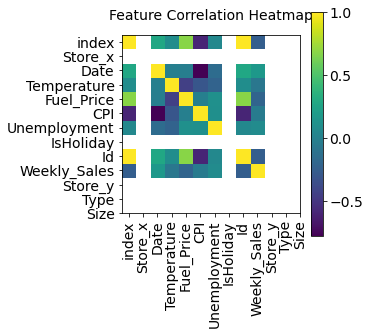

In [47]:
def show_heatmap(data):
    plt.figure(figsize=(20, 8))
    plt.matshow(df2.corr())
    plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df2)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotti

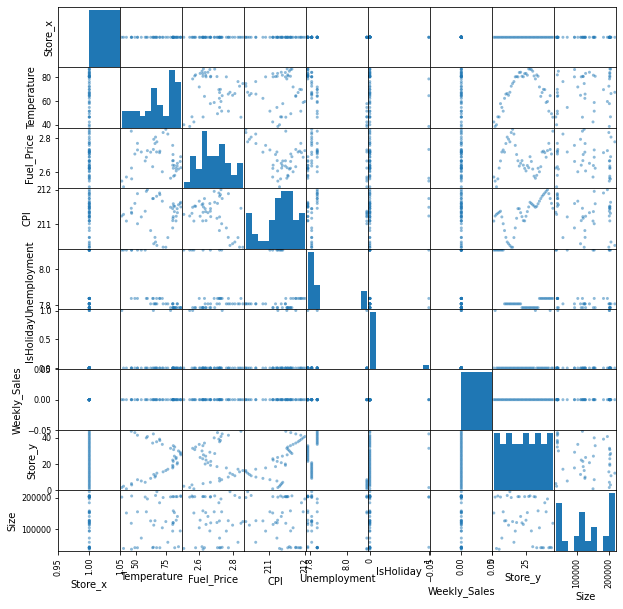

In [41]:
pd.plotting.scatter_matrix(df[['Store_x',	'Temperature',	'Fuel_Price',	'CPI','Unemployment',	'IsHoliday',	'Weekly_Sales',	'Store_y'	,'Size']], figsize=(10,10));